**CASOS DE FEMINICÍDIO**

- Objetivos
  - Tribunal que mais atendeu casos
  - Quantos ja tinham histórico de violência domentica
  - Qual foi o meio mais utilizado
  - Período dos fatos
  - Qual instumento mais utilizado

**Importar o Pandas e ler o arquivo**

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Casos de Feminicídio/bancocasos-feminicidio.xls')

# display(df)

**Eliminando colunas desnecessárias**

In [ ]:
df = df.drop(columns=['Número do processo',
                      'Crime na pronúncia',
                      'Crime na sentença', 
                      'Pena inicial', 'Pena após recurso', 
                      'Apelo ao sistema de justiça', 
                      'Menção à LMP (momento processual)'])
# display(df)

**Filtrar dados e realizar agrupamentos**

  **Tribunal que mais atendeu casos**

Text(0, 0.5, 'Quantidade de Casos')

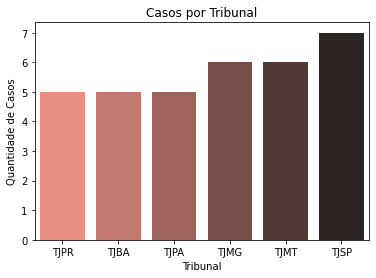

In [ ]:
import seaborn as sns
palette = sns.color_palette("dark:salmon_r")
order = df['Tribunal'].value_counts(ascending=True).index
plot = sns.countplot(x='Tribunal', data=df, palette=palette, order=order)
plot.set_title('Casos por Tribunal')
plot.set_ylabel('Quantidade de Casos')

**Quantos ja tinham histórico de violência domentica**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Text(0, 0.5, 'Quantidade de Casos')

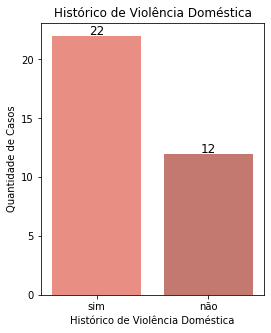

In [ ]:
import regex
import matplotlib.pyplot as plt

com_historico = (df.loc[df['Histórico de Violência Doméstica'].str.contains('Sim')])
com_historico_aux = (df.loc[df['Histórico de Violência Doméstica'].str.contains('sim')])
com_historico_aux2 = (df.loc[df['Histórico de Violência Doméstica'].str.startswith('Trata-se')])

com_historico.loc[com_historico['Histórico de Violência Doméstica'] != 'Sim', 'Histórico de Violência Doméstica'] = 'sim'
com_historico.loc[com_historico['Histórico de Violência Doméstica'] == 'Sim', 'Histórico de Violência Doméstica'] = 'sim'
com_historico_aux.loc[com_historico_aux['Histórico de Violência Doméstica'] != 'sim', 'Histórico de Violência Doméstica'] = 'sim'
com_historico_aux2.loc[com_historico_aux2['Histórico de Violência Doméstica'] != 'Trata-se', 'Histórico de Violência Doméstica'] = 'sim'

com_historico_uniao = pd.merge(com_historico, com_historico_aux, how='outer')
com_historico_definitivo = pd.merge(com_historico_uniao, com_historico_aux2, how='outer')


sem_historico = df.loc[df['Histórico de Violência Doméstica'].str.startswith('não')]
sem_historico_aux = df.loc[df['Histórico de Violência Doméstica'].str.contains('Não')]
sem_historico_aux2 = df.loc[df['Histórico de Violência Doméstica'].str.contains('sem')]

sem_historico.loc[sem_historico['Histórico de Violência Doméstica'] != 'não', 'Histórico de Violência Doméstica'] = 'não'
sem_historico_aux.loc[sem_historico_aux['Histórico de Violência Doméstica'] != 'Não', 'Histórico de Violência Doméstica'] = 'não'
sem_historico_aux2.loc[sem_historico_aux2['Histórico de Violência Doméstica'] != 'sem', 'Histórico de Violência Doméstica'] = 'não'

sem_historico_uniao = pd.merge(sem_historico, sem_historico_aux, how='outer')
sem_historico_definitivo = pd.merge(sem_historico_uniao, sem_historico_aux2, how='outer')


sem_historico_definitivo = sem_historico_definitivo.drop(columns=['N.',
                                            'Tribunal',
                                            'Instrumento',
                                            'Meio',
                                            'Data dos fatos',
                                            'Discurso sobre a vítima',
                                            'Discurso sobre o agressor',
                                            'Motivo do Crime',
                                            'Discurso de gênero (momento processual)'])
com_historico_definitivo = com_historico_definitivo.drop(columns=['N.',
                                            'Tribunal',
                                            'Instrumento',
                                            'Meio',
                                            'Data dos fatos',
                                            'Discurso sobre a vítima',
                                            'Discurso sobre o agressor',
                                            'Motivo do Crime',
                                            'Discurso de gênero (momento processual)'])

historico = pd.merge(com_historico_definitivo, sem_historico_definitivo, how='outer')

plt.figure(figsize=(4,5))
plot = sns.countplot(x='Histórico de Violência Doméstica', data=historico, palette=palette)
for i in plot.patches:
  plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center',
                va='baseline',
                fontsize=12,
                color='black',
                xytext=(0,1),
                textcoords='offset points')
plot.set_title('Histórico de Violência Doméstica')
plot.set_ylabel('Quantidade de Casos')

**Qual foi o meio mais utilizado**

In [ ]:
df.insert(4, 'Meio 1', '')
df.insert(5, 'Meio 2', '')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Text(0, 0.5, 'Quantidade de Casos')

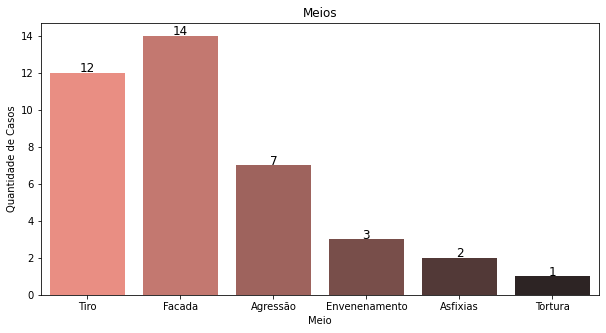

In [ ]:
# disparos, tiros
disparo = (df.loc[df['Meio'].str.contains('disparo')])
disparo.loc[disparo['Meio'] != 'disparo', 'Meio'] = 'Tiro'

tiro = df.loc[df['Meio'].str.contains('tiros')]
tiro.loc[tiro['Meio'] != 'tiro', 'Meio'] = 'Tiro'

total_disparo = pd.merge(tiro, disparo, how='outer')
# display(total_disparo['Meio'])


# faca, facada, esfaqueamento, "canivere"
faca = df.loc[df['Meio'].str.contains('faca')]
faca_aux = df.loc[df['Meio'].str.contains('Faca')]

golpe_faca = df.loc[[20,21]]
golpe_faca.loc[golpe_faca['Meio'] != 'facada', 'Meio'] = 'Facada'

df.loc[7, 'Meio'] = 'Facada'
df.loc[7, 'Meio 1'] = 'Agressão'

canivete = (df.loc[df['Meio'].str.contains('caniv')])
canivete.loc[canivete['Meio'] != 'facada', 'Meio'] = 'Facada'


faca.loc[faca['Meio'] != 'faca', 'Meio'] = 'Facada'

facada_aux = pd.merge(faca, faca_aux, how='outer')
# facada = pd.merge(canivete, facada_aux, how='outer')
# total_facada = pd.merge(facada, golpe_faca, how='outer')
# display(total_facada['Meio'])


# espancamento, golpes*
agressao = (df.loc[df['Meio'].str.contains('Agressão')])
agressao_meio1 = (df.loc[df['Meio 1'].str.contains('Agressão')])

df.loc[0, 'Meio'] = 'Agressão'
df.loc[10, 'Meio'] = 'Agressão'
df.loc[10, 'Meio 1'] = 'Esganamento'
df.loc[10, 'Meio 2'] = 'Soda caustica'
 
golpe = (df.loc[df['Meio'].str.contains('golpe')])
golpe_sem_faca = (golpe.loc[golpe['Meio'].str.contains('faca')==False])
golpe_sem_faca = golpe_sem_faca.drop(index=25)
golpe_sem_faca = golpe_sem_faca.drop(index=20)
golpe_sem_faca = golpe_sem_faca.drop(index=21)
# display(golpe_sem_faca['Meio'])

df.loc[31, 'Meio'] = 'Sedação'
df.loc[31, 'Meio 1'] = 'Agressão'
df.loc[31, 'Meio 2'] = 'Tortura'
golpe_sem_faca.loc[golpe_sem_faca['Meio'] != 'agressão', 'Meio'] = 'Agressão' 
agressao_aux = pd.merge(agressao, golpe_sem_faca, how='outer')
total_agressao = pd.merge(agressao_aux, agressao_meio1, how='outer')
# display(agressao_total['Meio'])


# asfixia, esganamento, enforcamento, afogamento
asfixia = df.loc[df['Meio'].str.contains('asfixia')]
esganamento = df.loc[df['Meio 1'].str.contains('Esganamento')]

asfixias = pd.merge(asfixia, esganamento, how='outer')

df.loc[13, 'Meio'] = 'asfixia'
df.loc[13, 'Meio 1'] = 'afogamento'

asfixias.loc[0, 'Meio'] = 'Asfixias'
asfixias.loc[0, 'Meio 1'] = 'Asfixias'
asfixias.loc[1, 'Meio 1'] = 'Asfixias'
# display(asfixias)


# envenenamento, soda, asrsênico, diazepan, Sedação 3
# Arsênico é "instrumento" e envenenamento o meio
# Meio 2 -> soda caustica
df.loc[29, 'Meio'] = 'Envenenamento'
df.loc[29, 'Instrumento'] = 'Arsênico'
df.loc[10, 'Meio 2'] = 'Envenenamento'

envenenamento = df.loc[df['Meio'].str.contains('Envenenamento')]
sedacao = df.loc[df['Meio'].str.contains('Sedação')]
sedacao.loc[31, 'Meio'] = 'Envenenamento'
envenenamento_aux = df.loc[df['Meio 2'].str.contains('Envenenamento')]

envenenamento_aux2 = pd.merge(envenenamento, sedacao, how='outer')
total_envenenamento = pd.merge(envenenamento_aux2, envenenamento_aux, how='outer')
# display(total_envenenamento)


# tortura
tortura = df.loc[df['Meio 2'].str.contains('Tortura')]
# display(tortura)

#Merge total e exclusão de colunas

meio = pd.merge(total_disparo, total_facada, how='outer')
meio['Data dos fatos'] = meio['Data dos fatos'].astype(str)
agressao_envenenamento = pd.merge(total_agressao, total_envenenamento, how='outer')

tortura_asfixia = pd.merge(tortura, asfixias, how='outer')
meio_aux = pd.merge(meio, agressao_envenenamento, how='outer')

total_meio = pd.merge(meio_aux, tortura_asfixia, how='outer')

total_meio = total_meio.drop(columns=['Tribunal',
                                      'Motivo do Crime',
                                      'Histórico de Violência Doméstica',
                                      'Data dos fatos',
                                      'Discurso sobre a vítima',
                                      'Discurso sobre o agressor',
                                      'Discurso de gênero (momento processual)'])

total_meio.drop(total_meio.index[[16, 27, 32]], inplace=True)
total_meio.loc[36, 'Meio 2'] = 'Envenenamento'
total_meio.reset_index(inplace=True)

total_meio_aux = total_meio
total_meio_aux.reset_index(inplace=True)
total_meio_aux = total_meio_aux.drop(columns='index')

total_meio_aux = total_meio_aux.append(total_meio.loc[[29,31,33,31,33]])
total_meio_aux = total_meio_aux.drop(columns='level_0')
total_meio_aux.reset_index(inplace=True)
total_meio_aux = total_meio_aux.drop(columns='index')

index = total_meio_aux.index
for i in index:
  if i >= 34:
    if i < 37:
      total_meio_aux.loc[i, 'Meio'], total_meio_aux.loc[i, 'Meio 1'] = total_meio_aux.loc[i, 'Meio 1'], total_meio_aux.loc[i, 'Meio']
    else:
      total_meio_aux.loc[i, 'Meio'], total_meio_aux.loc[i, 'Meio 2'] = total_meio_aux.loc[i, 'Meio 2'], total_meio_aux.loc[i, 'Meio']
    
# display(total_meio_aux.count())


plt.figure(figsize=(10,5))
plot = sns.countplot(x='Meio', data=total_meio_aux, palette=palette)
for i in plot.patches:
  plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center',
                va='baseline',
                fontsize=12,
                color='black',
                xytext=(0,1),
                textcoords='offset points')
plot.set_title('Meios')
plot.set_ylabel('Quantidade de Casos')

# display(total_meio)

**Período dos Fatos**

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._

Text(0.5, 0, 'Anos')

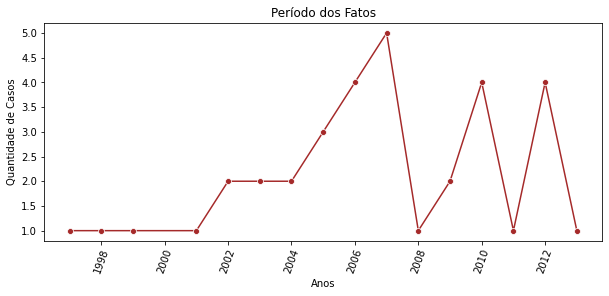

In [ ]:
periodo = df[['Data dos fatos', 'N.', 'Tribunal']]

periodo.drop(index=0, inplace=True)
periodo.loc[25] = 1998
periodo.loc[29] = 2001
periodo.loc[34] = 2002
periodo.loc[35] = 2003
periodo.loc[25, 'N.'] = 26
periodo.loc[29, 'N.'] = 30
periodo.loc[34, 'N.'] = 35
periodo.loc[35, 'N.'] = 36

count = periodo
count = periodo.groupby(by='Data dos fatos', sort=True).count()
count.rename_axis('Data dos fatos', axis='columns', inplace=True)

# display(count)
# display(count.index)
order = count.index.value_counts(ascending=True)
plt.figure(figsize=(10,4))
plt.xticks(rotation=70)
plot = sns.lineplot(data=count, x=count.index, y='N.', color='brown', marker='o')
plot.set_title('Período dos Fatos')
plot.set_ylabel('Quantidade de Casos')
plot.set_xlabel('Anos')



**Instrumento Mais Utilizado**

In [ ]:
instrumento = total_meio_aux
instrumento = instrumento.drop(columns=['level_0'])
instrumento = instrumento.drop(index=[34,35,36,37,38])
instrumento.insert(2, 'Instrumento 1', '')
instrumento.insert(3, 'Instrumento 2', '')

Text(0.5, 0, 'Instrumentos')

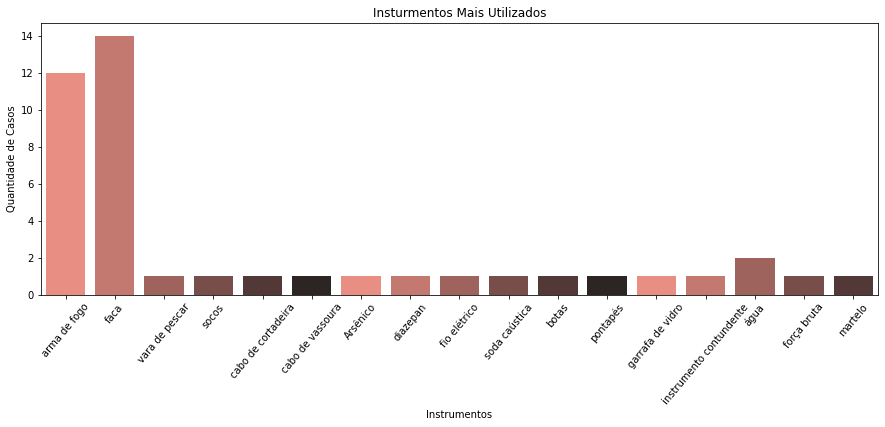

In [ ]:
instrumento.loc[7, 'Instrumento'] = 'arma de fogo'
instrumento.loc[17, 'Instrumento'] = 'faca'
instrumento.loc[12, 'Instrumento'] = 'faca'


# instrumento 1 -> 25, 26, 28, 31, 32, 33
instrumento.loc[25, 'Instrumento'] = 'vara de pescar'
instrumento.loc[25, 'Instrumento 1'] = 'botas'
instrumento.loc[26, 'Instrumento'] = 'socos'
instrumento.loc[26, 'Instrumento 1'] = 'pontapés'
instrumento.loc[26, 'Instrumento 2'] = 'martelo'
instrumento.loc[28, 'Instrumento'] = 'cabo de vassoura'
instrumento.loc[28, 'Instrumento 1'] = 'garrafa de vidro'
instrumento.loc[31, 'Instrumento'] = 'diazepan'
instrumento.loc[31, 'Instrumento 1'] = 'instrumento contundente'
instrumento.loc[31, 'Instrumento 2'] = 'água'
instrumento.loc[32, 'Instrumento'] = 'fio elétrico'
instrumento.loc[32, 'Instrumento 1'] = 'água'
instrumento.loc[33, 'Instrumento'] = 'soda caústica'
instrumento.loc[33, 'Instrumento 1'] = 'força bruta'


# INSTRUMENTO 1
# instrumento = instrumento.append(instrumento.loc[[25,26,28,31,32,33]])
# INSTRUMENTO 2
# instrumento = instrumento.append(instrumento.loc[[26,31]])

# instrumento = instrumento.drop(index=[40,42])

# instrumento.reset_index(inplace=True)


# INVERSÕES

index = instrumento.index
for i in index:
  if i >= 34:
    if i < 40:
      instrumento.loc[i, 'Instrumento'], instrumento.loc[i, 'Instrumento 1'] = instrumento.loc[i, 'Instrumento 1'], instrumento.loc[i, 'Instrumento']
    else:
      instrumento.loc[i, 'Instrumento'], instrumento.loc[i, 'Instrumento 2'] = instrumento.loc[i, 'Instrumento 2'], instrumento.loc[i, 'Instrumento']

plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
plot = sns.countplot(data=instrumento, x='Instrumento', palette=palette)
plot.set_title('Insturmentos Mais Utilizados')
plot.set_ylabel('Quantidade de Casos')
plot.set_xlabel('Instrumentos')

# display(instrumento)